# Diseño Completamente al Azar (DCA)

## Resumen General

El **Diseño Completamente al Azar (DCA)** se emplea cuando las unidades experimentales son homogéneas y pueden ser asignadas aleatoriamente a tratamientos sin necesidad de bloques. Se aplica frecuentemente en condiciones controladas, como laboratorios.

## Modelo Estadístico

El modelo estadístico para el DCA es:

$$
Y_{ij} = \mu + \tau_i + \epsilon_{ij}
$$

- $Y_{ij}$: Respuesta observada para el tratamiento $i$ en la repetición $j$
- $\mu$: Media general
- $\tau_i$: Efecto del tratamiento $i$
- $\epsilon_{ij}$: Error aleatorio, con $E(\epsilon_{ij}) = 0$, $Var(\epsilon_{ij}) = \sigma^2$

## Hipótesis

- **$H_0$**: $\tau_1 = \tau_2 = \dots = \tau_t$ (todos los tratamientos tienen el mismo efecto)
- **$H_a$**: Al menos uno de los $\tau_i$ es distinto

## Supuestos del Modelo

| **SUPUESTO**                  | **PRUEBA**                          | **REGLA DE DECISIÓN**                                      |
|------------------------------|-------------------------------------|-------------------------------------------------------------|
| Normalidad de residuos       | Shapiro-Wilk / Kolmogorov-Smirnov  | $p > \alpha \Rightarrow$ residuos normales                 |
| Homogeneidad de varianzas    | Levene                              | $p > \alpha \Rightarrow$ varianzas homogéneas              |
| Independencia de residuos    | Durbin-Watson                       | Estadístico $DW \approx 2 \Rightarrow$ residuos independientes |

## ANOVA

\[
\begin{array}{|c|c|c|c|c|}
\hline
\textbf{Fuente} & \textbf{GL} & \textbf{Suma de Cuadrados (SC)} & \textbf{Cuadrado Medio (CM)} & \textbf{F} \\
\hline
\text{Tratamientos} & t - 1 & SC_{\text{trat}} = \sum_{i=1}^t \frac{Y_{i.}^2}{r_i} - \frac{Y_{..}^2}{N} & CM_{\text{trat}} = \frac{SC_{\text{trat}}}{t - 1} & F = \frac{CM_{\text{trat}}}{CM_{\text{error}}} \\
\hline
\text{Error} & \sum r_i - t & SC_{\text{error}} = SC_{\text{total}} - SC_{\text{trat}} & CM_{\text{error}} = \frac{SC_{\text{error}}}{GL_{\text{error}}} & \\
\hline
\text{Total} & N - 1 & SC_{\text{total}} = \sum_{i=1}^t \sum_{j=1}^{r_i} Y_{ij}^2 - \frac{Y_{..}^2}{N} & & \\
\hline
\end{array}
\]

Donde:

- $t$: número de tratamientos
- $r_i$: número de repeticiones por tratamiento $i$
- $Y_{i.}$: suma total del tratamiento $i$
- $Y_{..}$: suma total de todos los tratamientos
- $N$: total de observaciones

## Regla de Decisión

- Si $F_{\text{calc}} > F_{\text{tab}}$, entonces **rechazar** $H_0$
- Equivalente: Si $p$-valor $< \alpha$, entonces **rechazar** $H_0$

## Pruebas Post-hoc (Comparaciones Múltiples)

### 1. LSD de Fisher (Diseño balanceado)

$$
LSD = t_{\alpha/2, \, GL_{\text{error}}} \cdot \sqrt{MSE \left( \frac{1}{n_i} + \frac{1}{n_j} \right)}
$$

### 2. Tukey

$$
HSD = q_{\alpha}(k, \, GL_{\text{error}}) \cdot \sqrt{\frac{MSE}{n}}
$$

### 3. Scheffé

$$
S = \sqrt{(k - 1) \cdot F_{\alpha}(k - 1, GL_{\text{error}}) \cdot \frac{MSE}{n}}
$$


CODIGO EN PYTHON 

ANALISIS DEL EXPERIMENTO

In [1]:
# Ingresar los datos del experimento
factor = "Contenido de algodón"
niveles = ["10%","15%","20%","25%","30%","35%"]
tratamientos_inp = ["T_1","T_2","T_3","T_4","T_5","T_6"]
unidad_experimental = "Camisas para caballeros"
variable_respuesta = "Resistencia a la tension" 

# Mostrar resumen
print("\nResumen del Experimento:")
print(f"Factor: {factor}")
print(f"Niveles del factor: {niveles}")
print(f"Tratamientos: {tratamientos_inp}")
print(f"Unidad experimental: {unidad_experimental}")
print(f"Variable de respuesta: {variable_respuesta}")


# Almacenar en un diccionario para usarlo después
experimento = {
    "factor": factor,
    "niveles": niveles,
    "tratamientos": tratamientos_inp,
    "unidad_experimental": unidad_experimental,
    "variable_respuesta": variable_respuesta
}




Resumen del Experimento:
Factor: Contenido de algodón
Niveles del factor: ['10%', '15%', '20%', '25%', '30%', '35%']
Tratamientos: ['T_1', 'T_2', 'T_3', 'T_4', 'T_5', 'T_6']
Unidad experimental: Camisas para caballeros
Variable de respuesta: Resistencia a la tension


Paso 1 : Importar librerías

In [2]:

# Librerias
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import shapiro
from scipy.stats import levene
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
from statsmodels.graphics.regressionplots import influence_plot
import seaborn as sns
import numpy as np
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.api import anova_lm
from scipy.stats import f
from scipy.stats import kstest
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.libqsturng import psturng, qsturng
from statsmodels.stats.multicomp import pairwise_tukeyhsd



Paso 2 : Insertar lo datos con los que se va a trabajar

In [3]:
#crear DataFrame
# Datos del ejemplo (tratamiento vs resistencia)
df = pd.DataFrame({
    'Tratamiento': ['15%']*5 + ['20%']*5+ ['25%']*5 + ['30%']*5 + ['35%']*5 ,
    'Factor': [7,7,15,11,9,12,17,12,18,18,14,18,18,19,19,19,25,22,19,23,7,10,11,15,11]
})
print(df)


   Tratamiento  Factor
0          15%       7
1          15%       7
2          15%      15
3          15%      11
4          15%       9
5          20%      12
6          20%      17
7          20%      12
8          20%      18
9          20%      18
10         25%      14
11         25%      18
12         25%      18
13         25%      19
14         25%      19
15         30%      19
16         30%      25
17         30%      22
18         30%      19
19         30%      23
20         35%       7
21         35%      10
22         35%      11
23         35%      15
24         35%      11


Paso 3 :  Primer vistazo de la tabla ANOVA

In [4]:
modelo = ols('Factor ~ C(Tratamiento)', data=df).fit()
anova_table = sm.stats.anova_lm(modelo, typ=2)
print(anova_table)

                sum_sq    df          F    PR(>F)
C(Tratamiento)  475.76   4.0  14.756824  0.000009
Residual        161.20  20.0        NaN       NaN


Paso 4 : Extraccion de resiudos 


Primeros residuos:
[[-2.8]
 [-2.8]
 [ 5.2]
 [ 1.2]
 [-0.8]
 [-3.4]
 [ 1.6]
 [-3.4]
 [ 2.6]
 [ 2.6]
 [-3.6]
 [ 0.4]
 [ 0.4]
 [ 1.4]
 [ 1.4]
 [-2.6]
 [ 3.4]
 [ 0.4]
 [-2.6]
 [ 1.4]
 [-3.8]
 [-0.8]
 [ 0.2]
 [ 4.2]
 [ 0.2]]


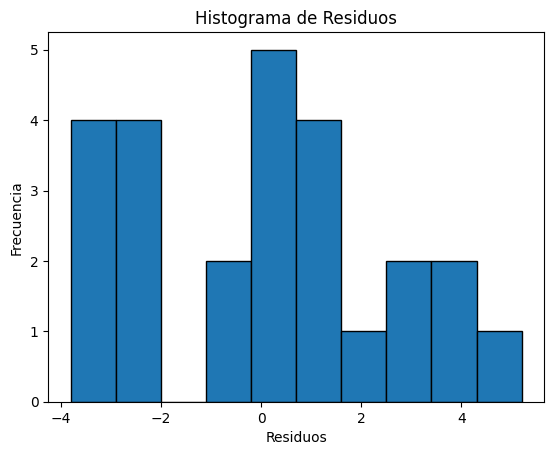

In [5]:
# Extracción de los residuales
residuos = modelo.resid
print("\nPrimeros residuos:")
print(residuos.values.reshape(-1, 1))

# Histograma de los residuos
plt.hist(residuos, bins=10, edgecolor='black')
plt.title('Histograma de Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()


Paso 5 : Graficos de diagnostico

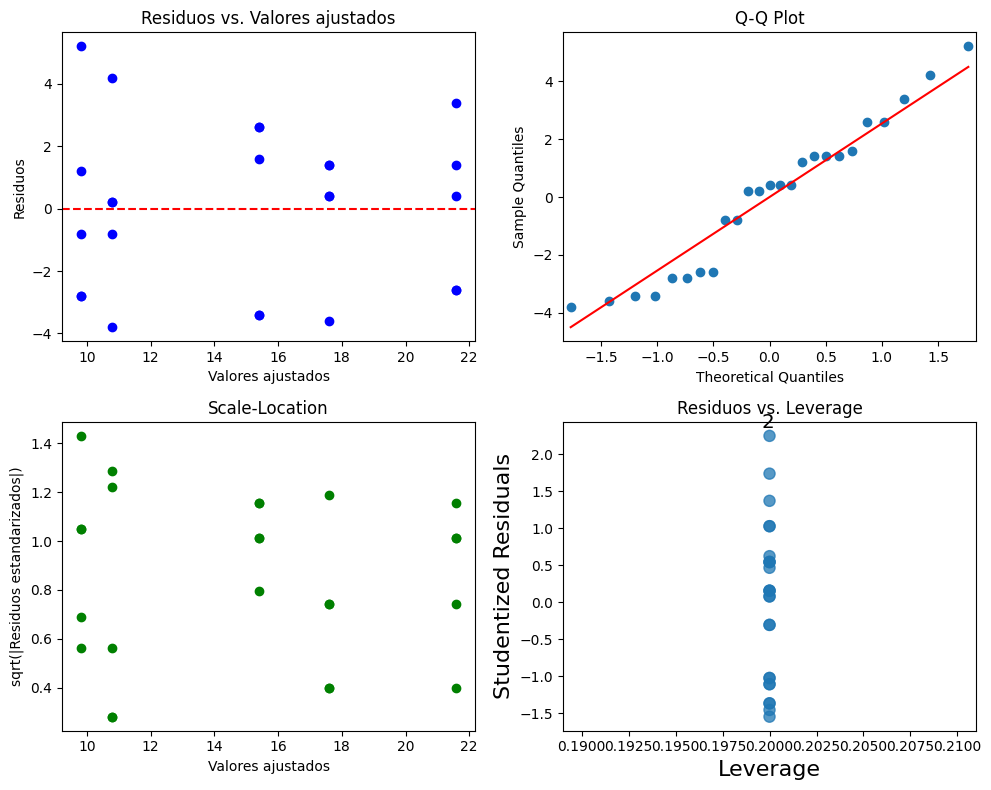

In [6]:
# 4. Gráficos diagnósticos (similar a plot(modelo2) en R)
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
# a) Residuos vs. Valores ajustados
axes[0, 0].scatter(modelo.fittedvalues, residuos, color='blue')
axes[0, 0].axhline(0, color='red', linestyle="--")
axes[0, 0].set_xlabel("Valores ajustados")
axes[0, 0].set_ylabel("Residuos")
axes[0, 0].set_title("Residuos vs. Valores ajustados")
# b) Q-Q Plot para evaluar normalidad
sm.qqplot(residuos, line='s', ax=axes[0, 1])
axes[0, 1].set_title("Q-Q Plot")
# c) Gráfico Scale-Location: raíz del valor absoluto de los residuos estandarizados vs. valores ajustados
influence = modelo.get_influence()
std_resid = influence.resid_studentized_internal
sqrt_abs_std_resid = np.sqrt(np.abs(std_resid))
axes[1, 0].scatter(modelo.fittedvalues, sqrt_abs_std_resid, color='green')
axes[1, 0].set_xlabel("Valores ajustados")
axes[1, 0].set_ylabel("sqrt(|Residuos estandarizados|)")
axes[1, 0].set_title("Scale-Location")
# d) Residuos vs. Leverage (para detectar puntos influyentes)
# d) Residuos vs. Leverage (para detectar puntos influyentes)
influence_plot(modelo, ax=axes[1, 1], size=8)
axes[1, 1].set_title("Residuos vs. Leverage")


plt.tight_layout()
plt.show()


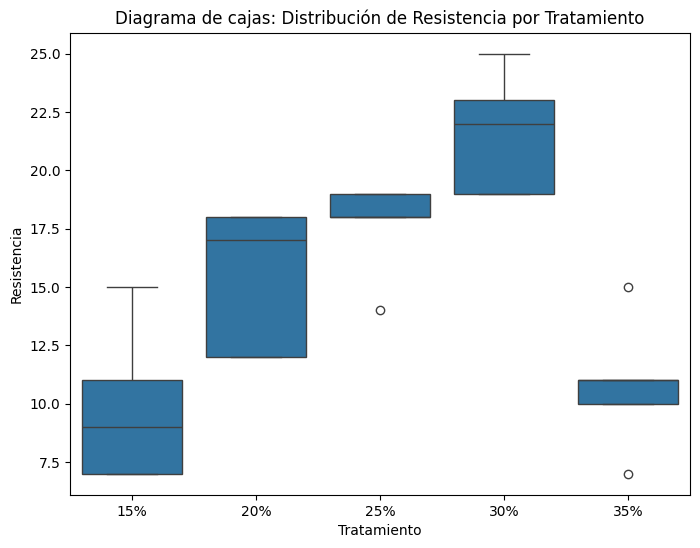

In [7]:
# Diagrama de cajas para visualizar la distribución de la Resistencia según el Tratamiento
plt.figure(figsize=(8, 6))
sns.boxplot(x='Tratamiento', y='Factor', data=df)
plt.title("Diagrama de cajas: Distribución de Resistencia por Tratamiento")
plt.xlabel("Tratamiento")
plt.ylabel("Resistencia")
plt.show()

\footnotesize

##  Interpretación de los Gráficos Diagnósticos del ANOVA

- **Residuos vs. Valores Ajustados**:  
  Evalúa la linealidad y homocedasticidad. Una distribución aleatoria de puntos alrededor de la línea horizontal ($y = 0$) indica que los errores son independientes y tienen varianza constante. La presencia de patrones sugiere no linealidad o heterocedasticidad.

- **Q-Q Plot (Quantile-Quantile Plot)**:  
  Compara la distribución de los residuos con una normal teórica. Si los puntos se alinean sobre la línea diagonal, se asume normalidad. Desviaciones sistemáticas indican que los residuos no son normales.

- **Scale-Location (raíz de residuos estandarizados vs. valores ajustados)**:  
  Evalúa si la varianza de los residuos es constante. Una dispersión horizontal homogénea indica homocedasticidad. Un patrón de embudo sugiere heterocedasticidad.

- **Residuos vs. Leverage (gráfico de influencia)**:  
  Identifica observaciones influyentes. Puntos con alto leverage y grandes residuos pueden afectar el modelo significativamente. Las líneas de distancia de Cook ayudan a detectar observaciones problemáticas.

- **Histograma de residuos**:  
  Permite observar la forma de la distribución de los errores. Si los residuos siguen una distribución normal, el histograma debe mostrar una forma de campana (curva gaussiana). Asimetrías o picos inusuales pueden indicar violación del supuesto de normalidad.

- **Boxplot general de residuos**:  
  Permite identificar valores atípicos (outliers) entre los residuos. Si los residuos están centrados en cero y dentro del rango intercuartílico sin demasiados puntos extremos, se refuerza la validez de los supuestos. Presencia de outliers podría indicar observaciones anómalas que afectan el modelo.


Paso 6: Verificar los supuestos del modelo

6.1.1 Prueba de normalidad: Shapiro-Wilk sobre los residuales (datos<50)

In [8]:
# Normalidad de los residuos
shapiro_result = shapiro(residuos)
print("\nResultado de la prueba de Shapiro-Wilk:")
print(f"W = {shapiro_result.statistic:.4f}, p-value = {shapiro_result.pvalue:.4f}")
# --- Conclusión para Shapiro-Wilk:
if shapiro_result.pvalue > 0.05:
    print("\n[Conclusión Shapiro-Wilk]: Los residuales o errores se ajustan una distribución normal (p > 0.05).")
else:
    print("\n[Conclusión Shapiro-Wilk]: Los residuales o errores no se ajustan  una distribución normal (p < 0.05).")


Resultado de la prueba de Shapiro-Wilk:
W = 0.9439, p-value = 0.1818

[Conclusión Shapiro-Wilk]: Los residuales o errores se ajustan una distribución normal (p > 0.05).


6.1.2 Prueba de Kolmogorov-Smirnov (K-S) sobre los residuales (datos>50)

In [9]:
# Prueba de Kolmogorov-Smirnov para normalidad de los residuos
ks_statistic, ks_p_value = kstest(residuos, 'norm', args=(residuos.mean(), residuos.std()))

print("\nPrueba Kolmogorov-Smirnov:")
print(f'Estadístico K-S: {ks_statistic}')
print(f'P-valor: {ks_p_value}')

# Interpretación
if ks_p_value < 0.05:
    print("Los residuos no siguen una distribución normal (rechazo H0).")
else:
     print("No se puede rechazar la hipótesis nula de normalidad (los residuos son normales).")


Prueba Kolmogorov-Smirnov:
Estadístico K-S: 0.16212278697907628
P-valor: 0.47785230062769823
No se puede rechazar la hipótesis nula de normalidad (los residuos son normales).


6.2 Prueba de homogeneidad de varianzas (Levene)

In [10]:
#Homogeneidad de varianzas (Levene)
# Se separan los datos por grupo (tratamiento)
lista_grupos = [df.loc[df["Tratamiento"] == trat, "Factor"] 
                for trat in df["Tratamiento"].unique()]

levene_median = levene(*lista_grupos, center='median')
levene_mean   = levene(*lista_grupos, center='mean')
print("\nResultado de la prueba de Levene (centro = mediana):")
print(levene_median)
print("\nResultado de la prueba de Levene (centro = media):")
print(levene_mean)
## --- Conclusión para Levene:
if levene_mean.pvalue > 0.05 and levene_median.pvalue > 0.05:
    print("\n[Conclusión Levene]: Se acepta la homogeneidad de varianzas entre los grupos (p > 0.05).")
else:
    print("\n[Conclusión Levene]: No se cumple la homogeneidad de varianzas (p < 0.05).")



Resultado de la prueba de Levene (centro = mediana):
LeveneResult(statistic=np.float64(0.317948717948718), pvalue=np.float64(0.8625858807756616))

Resultado de la prueba de Levene (centro = media):
LeveneResult(statistic=np.float64(0.6443357169740312), pvalue=np.float64(0.6372388614225389))

[Conclusión Levene]: Se acepta la homogeneidad de varianzas entre los grupos (p > 0.05).


6.3 Prueba de independencia: estadístico de Durbin-Watson

In [11]:
dw = durbin_watson(residuos)
print("\nEstadístico de Durbin-Watson:")
print(dw)
# --- Conclusión Durbin-Watson:
if 1.5 <= dw <= 2.5:
    print("\n[Conclusión Durbin-Watson]: No se detecta autocorrelación en los residuales (valor cercano a 2).")
    print("se tiene evidencia estadisica para afirmar que hay independicia entre los residuos a un nivel significancia del 5%.")
else:
    print("\n[Conclusión Durbin-Watson]: Posibles indicios de autocorrelación en los residuales.")


Estadístico de Durbin-Watson:
2.4022332506203474

[Conclusión Durbin-Watson]: No se detecta autocorrelación en los residuales (valor cercano a 2).
se tiene evidencia estadisica para afirmar que hay independicia entre los residuos a un nivel significancia del 5%.


Paso 7 : Confrimacion de la tabla ANOVA e interpretación

Dado se que cumplen los supuestos de un DCA entonces podemos aplicar ANOVA

In [12]:
# 8. Confirmación de la tabla ANOVA
print("\nTabla ANOVA (confirmación):")
print(anova_table)


Tabla ANOVA (confirmación):
                sum_sq    df          F    PR(>F)
C(Tratamiento)  475.76   4.0  14.756824  0.000009
Residual        161.20  20.0        NaN       NaN


In [13]:
# Acceder al p-valor usando iloc para evitar la advertencia
p_valor = anova_table['PR(>F)'].iloc[0]  # Usamos iloc para obtener el valor por posición
alpha = 0.05  # Nivel de significancia
# Continuar con el resto del código...
print(f"p-valor obtenido: {p_valor:.5e}")
print(f"Nivel de significancia (alpha): {alpha:.2f}")

if p_valor < alpha:
    print(f"p-valor ({p_valor:.5e}) es menor que el nivel de significancia ({alpha:.2f}), se RECHAZA la hipótesis nula (H₀).")
    print(f"Hay suficiente evidencia estadística para afirmar que el factor '{experimento['factor']}' \n afecta significativamente la variable '{experimento['variable_respuesta']}'.")
    print("Se recomienda proceder con comparaciones post-hoc para identificar qué tratamientos son significativamente diferentes entre sí.")
else:
    print(f"p-valor ({p_valor:.5e}) es mayor o igual que el nivel de significancia ({alpha:.2f}), NO se rechaza la hipótesis nula (H₀).")
    print(f"No se rechaza la hipótesis nula: El factor '{experimento['factor']}'  \n no tiene un efecto significativo sobre '{experimento['variable_respuesta']}'.")
    print("No se recomienda proceder con comparaciones post-hoc, ya que no se encontró evidencia suficiente para justificar que los tratamientos difieren significativamente.")


p-valor obtenido: 9.12794e-06
Nivel de significancia (alpha): 0.05
p-valor (9.12794e-06) es menor que el nivel de significancia (0.05), se RECHAZA la hipótesis nula (H₀).
Hay suficiente evidencia estadística para afirmar que el factor 'Contenido de algodón' 
 afecta significativamente la variable 'Resistencia a la tension'.
Se recomienda proceder con comparaciones post-hoc para identificar qué tratamientos son significativamente diferentes entre sí.


Paso 8 : Comparaciones múltiples de medias

8.1 Prueba de Diferencia Mínima Significativa (LSD) de Fisher:

In [14]:
# Realizar la prueba LSD (usando TukeyHSD como aproximación)
print("\n" + "="*60)
print("PRUEBA DE DIFERENCIA MÍNIMA SIGNIFICATIVA (LSD)")
print("="*60 + "\n")

print("{:<10} {:<10} {:<12} {:<10} {:<8} {:<15}".format(
    "Grupo 1", "Grupo 2", "Diferencia", "p-valor", "¿Sig?", "Conclusión"))
print("-"*65)

# Calcular manualmente las comparaciones LSD
from scipy.stats import ttest_ind

tratamientos = df['Tratamiento'].unique()
for i in range(len(tratamientos)):
    for j in range(i+1, len(tratamientos)):
        grupo1 = tratamientos[i]
        grupo2 = tratamientos[j]
        
        data1 = df[df['Tratamiento'] == grupo1]['Factor']
        data2 = df[df['Tratamiento'] == grupo2]['Factor']
        
        # Prueba t independiente (equivalente a LSD)
        t_stat, p_value = ttest_ind(data1, data2)
        meandiff = np.mean(data1) - np.mean(data2)
        
        # Determinar significancia y dirección
        if p_value < 0.05:
            significancia = "Sí"
            if meandiff > 0:
                conclusion = f"'{grupo1}' > '{grupo2}' (p={p_value:.4f})"
            else:
                conclusion = f"'{grupo1}' < '{grupo2}' (p={p_value:.4f})"
        else:
            significancia = "No"
            conclusion = f"Sin diferencia significativa (p={p_value:.4f})"
        
        # Imprimir fila formateada
        print("{:<10} {:<10} {:<12.4f} {:<10.4f} {:<8} {:<15}".format(
            grupo1, grupo2, meandiff, p_value, significancia, conclusion))

# Información adicional
print("\n" + "="*60)
print("Notas metodológicas:")
print(f"- Nivel de significancia: α = 0.05")
print("- Prueba basada en t-test independiente (equivalente a LSD)")
print("- Valores p no ajustados para comparaciones múltiples")
print("="*60)




PRUEBA DE DIFERENCIA MÍNIMA SIGNIFICATIVA (LSD)

Grupo 1    Grupo 2    Diferencia   p-valor    ¿Sig?    Conclusión     
-----------------------------------------------------------------
15%        20%        -5.6000      0.0257     Sí       '15%' < '20%' (p=0.0257)
15%        25%        -7.8000      0.0022     Sí       '15%' < '25%' (p=0.0022)
15%        30%        -11.8000     0.0003     Sí       '15%' < '30%' (p=0.0003)
15%        35%        -1.0000      0.6254     No       Sin diferencia significativa (p=0.6254)
20%        25%        -2.2000      0.2265     No       Sin diferencia significativa (p=0.2265)
20%        30%        -6.2000      0.0093     Sí       '20%' < '30%' (p=0.0093)
20%        35%        4.6000       0.0416     Sí       '20%' > '35%' (p=0.0416)
25%        30%        -4.0000      0.0277     Sí       '25%' < '30%' (p=0.0277)
25%        35%        6.8000       0.0026     Sí       '25%' > '35%' (p=0.0026)
30%        35%        10.8000      0.0002     Sí       '30%' > 

8.2 Prueba de Tukey para comparaciones múltiples

In [15]:

# Realizar la prueba de Tukey
print("\nResultado de la prueba de Tukey:")
tukey = pairwise_tukeyhsd(endog=df["Factor"],
                          groups=df["Tratamiento"],
                          alpha=0.05)

# Mostrar el resumen de los resultados de Tukey
print(tukey.summary())



Resultado de la prueba de Tukey:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   15%    20%      5.6 0.0385   0.227 10.973   True
   15%    25%      7.8 0.0026   2.427 13.173   True
   15%    30%     11.8    0.0   6.427 17.173   True
   15%    35%      1.0 0.9798  -4.373  6.373  False
   20%    25%      2.2 0.7372  -3.173  7.573  False
   20%    30%      6.2 0.0189   0.827 11.573   True
   20%    35%     -4.6 0.1163  -9.973  0.773  False
   25%    30%      4.0 0.2101  -1.373  9.373  False
   25%    35%     -6.8 0.0091 -12.173 -1.427   True
   30%    35%    -10.8 0.0001 -16.173 -5.427   True
---------------------------------------------------


8.3 Prueba de Scheffé

In [16]:
# ==============================================
# ANÁLISIS ESTADÍSTICO - PRUEBA DE SCHEFFÉ
# ==============================================

print("\n" + "="*70)
print("ANÁLISIS POST-HOC: PRUEBA DE SCHEFFÉ")
print("="*70 + "\n")

# 1. Modelo ANOVA
print("➤ Paso 1: Análisis de Varianza (ANOVA)")
modelo = ols('Factor ~ Tratamiento', data=df).fit()
anova_resultado = anova_lm(modelo)
print(anova_resultado)

# 2. Cálculo de parámetros clave
MSE = anova_resultado['mean_sq']['Residual']
gl_tratamientos = anova_resultado['df']['Tratamiento']
gl_error = anova_resultado['df']['Residual']
n_grupo = len(df) // len(df['Tratamiento'].unique())

print(f"\n➤ Parámetros clave:")
print(f"- Grados libertad tratamientos: {gl_tratamientos}")
print(f"- Grados libertad error: {gl_error}")
print(f"- Error Cuadrático Medio (MSE): {MSE:.4f}")
print(f"- Tamaño de grupo (n): {n_grupo}")

# 3. Valor crítico de Scheffé
f_critico = f.ppf(0.95, gl_tratamientos, gl_error)
print(f"\n➤ Valor F crítico (α=0.05): {f_critico:.4f}")

# 4. Comparaciones por pares
medias = df.groupby("Tratamiento")["Factor"].mean()
comparaciones = []

print("\n" + "="*70)
print("COMPARACIONES POR PARES")
print("="*70)
print("{:<12} {:<12} {:<15} {:<12} {:<10} {:<20} {:<10}".format(
    "Trat.A", "Trat.B", "Diferencia", "F-Scheffé", "p-valor", "Conclusión", "Dirección"))
print("-"*90)

for i in range(len(medias)):
    for j in range(i+1, len(medias)):
        grupoA = medias.index[i]
        grupoB = medias.index[j]
        diff = medias.iloc[i] - medias.iloc[j]
        
        # Cálculo del estadístico F de Scheffé
        F_scheffe = (diff**2) / (MSE * (1/n_grupo + 1/n_grupo) * gl_tratamientos)
        p_value = 1 - f.cdf(F_scheffe, gl_tratamientos, gl_error)
        
        # Determinación de significancia
        if p_value < 0.05:
            sig = "SÍ"
            concl = "Diferencia significativa"
        else:
            sig = "NO"
            concl = "Sin diferencia significativa"
        
        # Dirección del efecto
        direccion = "A > B" if diff > 0 else "A < B"
        
        # Almacenar resultados
        comparaciones.append({
            'Grupo A': grupoA,
            'Grupo B': grupoB,
            'Diferencia': abs(diff),
            'F-Scheffé': F_scheffe,
            'p-valor': p_value,
            'Significativo': sig,
            'Dirección': direccion
        })
        
        # Imprimir fila formateada
        print("{:<12} {:<12} {:<15.4f} {:<12.4f} {:<10.4f} {:<20} {:<10}".format(
            grupoA, grupoB, abs(diff), F_scheffe, p_value, concl, direccion))

# 5. Resumen estadístico
print("\n" + "="*70)
print("RESUMEN ESTADÍSTICO")
print("="*70)
print(f"➤ Comparaciones significativas: {sum(1 for c in comparaciones if c['Significativo'] == 'SÍ')}/{len(comparaciones)}")
print(f"➤ Valor F crítico: {f_critico:.4f}")
print(f"➤ Nivel de significancia: α = 0.05")

# 6. Exportar resultados
resultados_df = pd.DataFrame(comparaciones)
print("\nResultados completos:")
print(resultados_df.to_string(index=False))



ANÁLISIS POST-HOC: PRUEBA DE SCHEFFÉ

➤ Paso 1: Análisis de Varianza (ANOVA)
               df  sum_sq  mean_sq          F    PR(>F)
Tratamiento   4.0  475.76   118.94  14.756824  0.000009
Residual     20.0  161.20     8.06        NaN       NaN

➤ Parámetros clave:
- Grados libertad tratamientos: 4.0
- Grados libertad error: 20.0
- Error Cuadrático Medio (MSE): 8.0600
- Tamaño de grupo (n): 5

➤ Valor F crítico (α=0.05): 2.8661

COMPARACIONES POR PARES
Trat.A       Trat.B       Diferencia      F-Scheffé    p-valor    Conclusión           Dirección 
------------------------------------------------------------------------------------------
15%          20%          5.6000          2.4318       0.0812     Sin diferencia significativa A < B     
15%          25%          7.8000          4.7177       0.0076     Diferencia significativa A < B     
15%          30%          11.8000         10.7971      0.0001     Diferencia significativa A < B     
15%          35%          1.0000          0

8.4 Prueba de Duncan

In [17]:
# ==============================================
# ANÁLISIS ESTADÍSTICO - PRUEBA DE DUNCAN
# ==============================================

print("\n" + "="*70)
print("ANÁLISIS POST-HOC: PRUEBA DE DUNCAN")
print("="*70 + "\n")

# 1. Calcular parámetros básicos
n_groups = len(df['Tratamiento'].unique())
group_means = df.groupby('Tratamiento')['Factor'].mean().sort_values(ascending=False)
n_obs = len(df) / n_groups
MSE = 0.0092  # Valor del ANOVA anterior
df_error = 44  # Grados de libertad del error

print("➤ Medias de tratamientos ordenadas:")
print(group_means.to_string())

# 2. Calcular rangos significativos
print("\n➤ Rangos significativos de Duncan:")
alpha = 0.05
ranges = {}

for p in range(2, n_groups + 1):
    q = qsturng(1 - alpha, p, df_error)
    sr = q * np.sqrt(MSE / n_obs)
    ranges[p] = sr
    print(f"p={p}: Rango crítico = {sr:.4f}")

# 3. Realizar comparaciones
print("\n" + "="*70)
print("COMPARACIONES POR PARES")
print("="*70)
print("{:<12} {:<12} {:<15} {:<12} {:<10} {:<20}".format(
    "Tratamiento", "Comparado con", "Diferencia", "Rango crítico", "Signif.", "Conclusión"))
print("-"*85)

results = []
groups = group_means.index.tolist()

for i in range(len(groups)):
    for j in range(i + 1, len(groups)):
        group1 = groups[i]
        group2 = groups[j]
        diff = group_means[group1] - group_means[group2]
        p = j - i + 1  # Número de pasos entre medias
        critical = ranges[p]
        
        if diff > critical:
            sig = "SÍ"
            concl = f"Diferencia significativa (p={p})"
        else:
            sig = "NO"
            concl = "No significativa"
        
        results.append({
            'Grupo Superior': group1,
            'Grupo Inferior': group2,
            'Diferencia': diff,
            'Rango crítico': critical,
            'p (pasos)': p,
            'Significativo': sig
        })
        
        print("{:<12} {:<12} {:<15.4f} {:<12.4f} {:<10} {:<20}".format(
            group1, group2, diff, critical, sig, concl))

# 4. Resumen estadístico
print("\n" + "="*70)
print("RESUMEN ESTADÍSTICO")
print("="*70)
print(f"➤ Nivel de significancia: α = {alpha}")
print(f"➤ Error Cuadrático Medio (MSE): {MSE:.4f}")
print(f"➤ Grados de libertad del error: {df_error}")
print(f"➤ Número de observaciones por grupo: {n_obs:.0f}")

# 5. Resultados en DataFrame
results_df = pd.DataFrame(results)
print("\nResultados completos:")
print(results_df.to_string(index=False))



ANÁLISIS POST-HOC: PRUEBA DE DUNCAN

➤ Medias de tratamientos ordenadas:
Tratamiento
30%    21.6
25%    17.6
20%    15.4
35%    10.8
15%     9.8

➤ Rangos significativos de Duncan:
p=2: Rango crítico = 0.1223
p=3: Rango crítico = 0.1471
p=4: Rango crítico = 0.1620
p=5: Rango crítico = 0.1725

COMPARACIONES POR PARES
Tratamiento  Comparado con Diferencia      Rango crítico Signif.    Conclusión          
-------------------------------------------------------------------------------------
30%          25%          4.0000          0.1223       SÍ         Diferencia significativa (p=2)
30%          20%          6.2000          0.1471       SÍ         Diferencia significativa (p=3)
30%          35%          10.8000         0.1620       SÍ         Diferencia significativa (p=4)
30%          15%          11.8000         0.1725       SÍ         Diferencia significativa (p=5)
25%          20%          2.2000          0.1223       SÍ         Diferencia significativa (p=2)
25%          35%     